# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [106]:
import pandas as pd 
import matplotlib.pyplot as plt  
from yellowbrick.cluster import KElbowVisualizer  
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore 
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [107]:
#memuat bank dataset csv

df = pd.read_csv("bank_dataset.csv")

df.head()

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   
2           19            Student                   56              1   
3           26            Student                   25              1   
4           26            Student                  198              1   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:08:08  
1        13758.91     2024-11-04 08:09:35  
2         1122.35     2024-11-04 08:07:04  
3         8569.06     2024-11-04 08:09:06  
4         7429.40     2024-11-04 08:06:39

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [108]:
#tinjau jumlah baris dan jenis data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [109]:
#melihat statistik kolom

print("statistik data\n")
df.describe()

statistik data



TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000

In [110]:
#identifikasi missing values

print("memeriksa nilai yang hilang\n")
df.isnull().sum()

memeriksa nilai yang hilang



TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [111]:
#menghapus missing values

df = df.dropna()
print(df)

     TransactionID AccountID  TransactionAmount      TransactionDate  \
0         TX000001   AC00128              14.09  2023-04-11 16:29:14   
1         TX000002   AC00455             376.24  2023-06-27 16:44:19   
2         TX000003   AC00019             126.29  2023-07-10 18:16:08   
3         TX000004   AC00070             184.50  2023-05-05 16:32:11   
4         TX000005   AC00411              13.45  2023-10-16 17:51:24   
5         TX000006   AC00393              92.15  2023-04-03 17:15:01   
6         TX000007   AC00199               7.08  2023-02-15 16:36:48   
7         TX000008   AC00069             171.42  2023-05-08 17:47:59   
8         TX000009   AC00135             106.23  2023-03-21 16:59:46   
9         TX000010   AC00385             815.96  2023-03-31 16:06:57   
10        TX000011   AC00150              17.78  2023-03-14 16:46:10   
11        TX000012   AC00459             190.02  2023-02-06 17:30:00   
12        TX000013   AC00392             494.52  2023-06-07 17:2

In [112]:
#statistik deskriptif variabel numerik

numeric_vars = ['TransactionAmount', 'CustomerAge', 'TransactionDuration']

descriptive_stats = df[numeric_vars].describe()

print("Statistik Deskriptif untuk Variabel Numerik:")
print(descriptive_stats)

Statistik Deskriptif untuk Variabel Numerik:
       TransactionAmount  CustomerAge  TransactionDuration
count        2512.000000  2512.000000          2512.000000
mean          297.593778    44.673965           119.643312
std           291.946243    17.792198            69.963757
min             0.260000    18.000000            10.000000
25%            81.885000    27.000000            63.000000
50%           211.140000    45.000000           112.500000
75%           414.527500    59.000000           161.000000
max          1919.110000    80.000000           300.000000


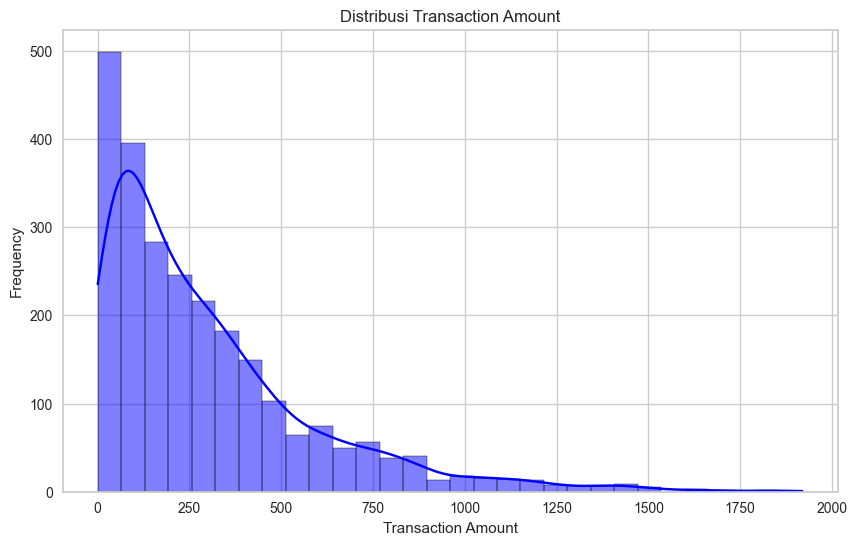

In [113]:
#histogram untuk TransactionAmount

plt.figure(figsize=(10, 6))
sns.histplot(df['TransactionAmount'], bins=30, kde=True, color='blue')
plt.title('Distribusi Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

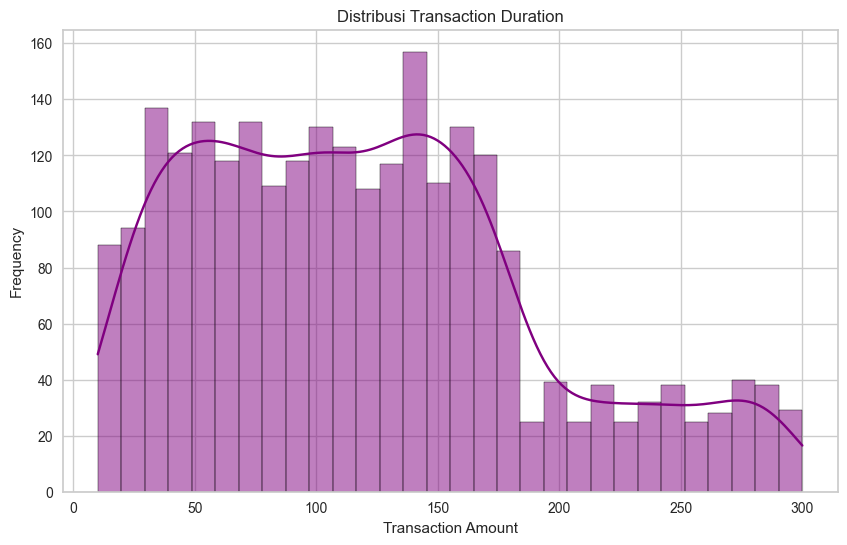

In [114]:
#histogram untuk TransactionDuration

plt.figure(figsize=(10, 6))
sns.histplot(df['TransactionDuration'], bins=30, kde=True, color='purple')
plt.title('Distribusi Transaction Duration')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

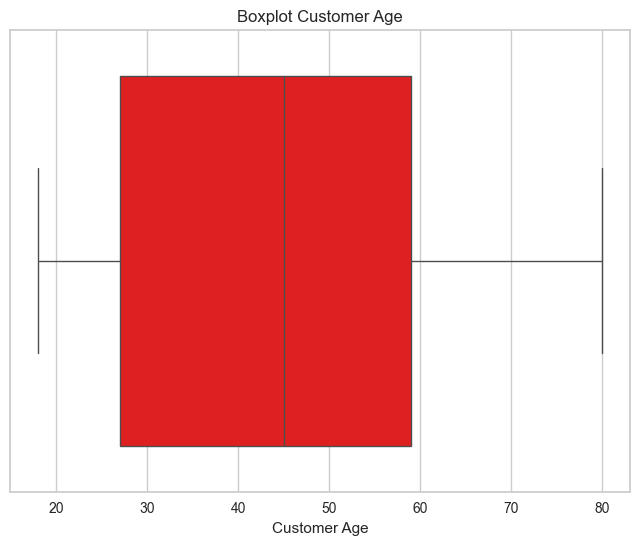

In [115]:
# Boxplot untuk CustomerAge
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['CustomerAge'], color='red')
plt.title('Boxplot Customer Age')
plt.xlabel('Customer Age')
plt.show()

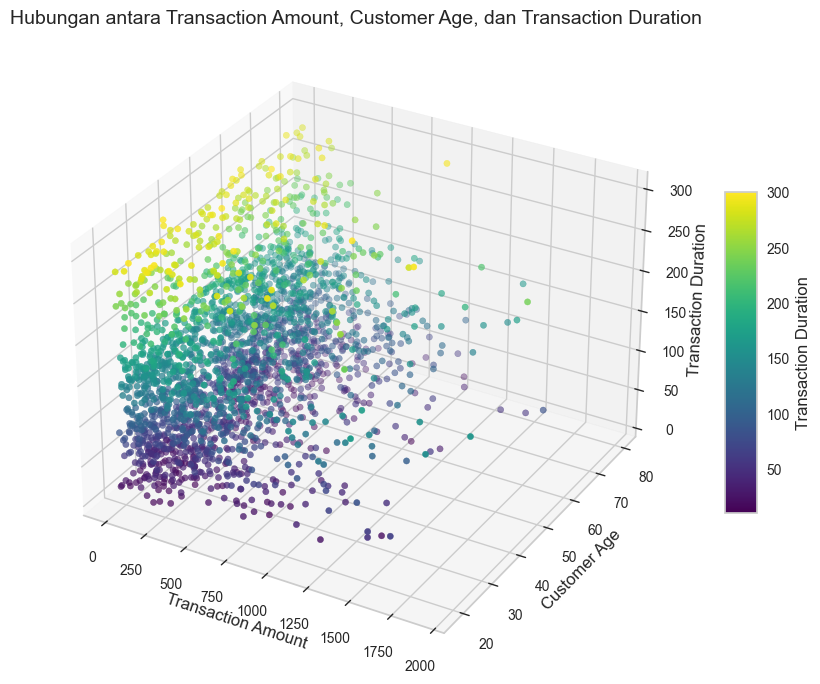

In [116]:
# 3D Scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['TransactionAmount'], 
    df['CustomerAge'], 
    df['TransactionDuration'], 
    c=df['TransactionDuration'],  # Warna berdasarkan TransactionDuration
    cmap='viridis'
)

ax.set_title('Hubungan antara Transaction Amount, Customer Age, dan Transaction Duration', fontsize=14)
ax.set_xlabel('Transaction Amount', fontsize=12)
ax.set_ylabel('Customer Age', fontsize=12)
ax.set_zlabel('Transaction Duration', fontsize=12)

cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Transaction Duration', fontsize=12)

plt.tight_layout()
plt.show()

In [117]:
#Distribusi CustomerOccupation

occupation_counts = df['CustomerOccupation'].value_counts()

print("Distribusi CustomerOccupation:")
print(occupation_counts)

Distribusi CustomerOccupation:
CustomerOccupation
Student     657
Doctor      631
Engineer    625
Retired     599
Name: count, dtype: int64


C:\Users\korez\AppData\Local\Temp\ipykernel_5108\990273637.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette='Set2')


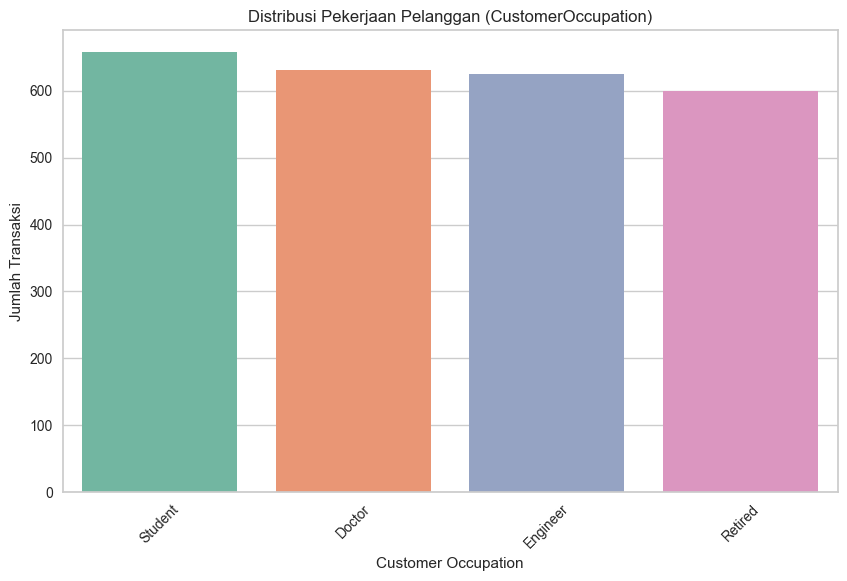

In [118]:
# Diagram batang untuk CustomerOccupation
plt.figure(figsize=(10, 6))
sns.barplot(x=occupation_counts.index, y=occupation_counts.values, palette='Set2')
plt.title('Distribusi Pekerjaan Pelanggan (CustomerOccupation)')
plt.xlabel('Customer Occupation')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()

In [119]:
#distribusi TransactionType

transaction_type_counts = df['TransactionType'].value_counts()

print("Distribusi TransactionType:")
print(transaction_type_counts)

Distribusi TransactionType:
TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64


C:\Users\korez\AppData\Local\Temp\ipykernel_5108\2307244604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transaction_type_counts.index, y=transaction_type_counts.values, palette='viridis')


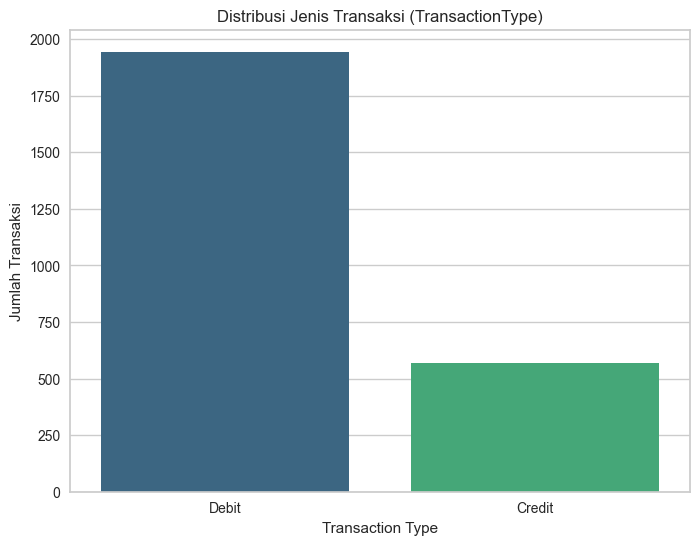

In [120]:
# Diagram batang untuk TransactionType
plt.figure(figsize=(8, 6))
sns.barplot(x=transaction_type_counts.index, y=transaction_type_counts.values, palette='viridis')
plt.title('Distribusi Jenis Transaksi (TransactionType)')
plt.xlabel('Transaction Type')
plt.ylabel('Jumlah Transaksi')
plt.show()

In [121]:
# Tabel kontingensi
contingency_table = pd.crosstab(df['CustomerOccupation'], df['TransactionType'])

print("Tabel Kontingensi CustomerOccupation vs TransactionType:")
print(contingency_table)

Tabel Kontingensi CustomerOccupation vs TransactionType:
TransactionType     Credit  Debit
CustomerOccupation               
Doctor                 140    491
Engineer               139    486
Retired                150    449
Student                139    518


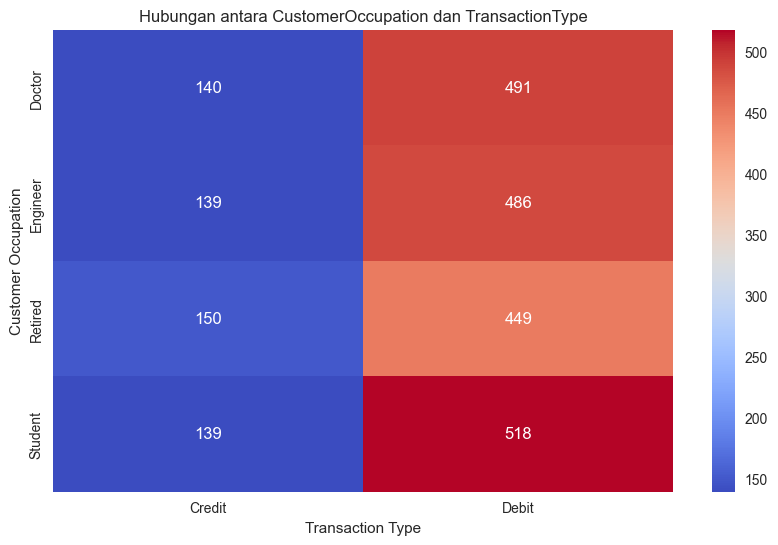

In [122]:
# Heatmap untuk tabel kontingensi
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='coolwarm')
plt.title('Hubungan antara CustomerOccupation dan TransactionType')
plt.xlabel('Transaction Type')
plt.ylabel('Customer Occupation')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [123]:
#standardisasi fitur numerik

columns_to_standardize = ['TransactionAmount', 'CustomerAge', 'TransactionDuration']

scaler = StandardScaler()

df_standardized = df.copy()
for col in columns_to_standardize:
    df_standardized[f'{col}_scaled'] = scaler.fit_transform(df[[col]])
df_standardized[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

print("Statistik Deskriptif Setelah Standardisasi:")
print(df_standardized[columns_to_standardize].describe())

pd.set_option('display.max_rows', None)  
print("\nDataset Setelah Standardisasi:")
print(df_standardized)

Statistik Deskriptif Setelah Standardisasi:
       TransactionAmount   CustomerAge  TransactionDuration
count       2.512000e+03  2.512000e+03         2.512000e+03
mean       -1.414297e-16  9.900078e-18         7.637203e-17
std         1.000199e+00  1.000199e+00         1.000199e+00
min        -1.018657e+00 -1.499493e+00        -1.567456e+00
25%        -7.390118e-01 -9.935526e-01        -8.097706e-01
50%        -2.961881e-01  1.832826e-02        -1.021205e-01
75%         4.006114e-01  8.053467e-01         5.912336e-01
max         5.555266e+00  1.985874e+00         2.578372e+00

Dataset Setelah Standardisasi:
     TransactionID AccountID  TransactionAmount      TransactionDate  \
0         TX000001   AC00128          -0.971275  2023-04-11 16:29:14   
1         TX000002   AC00455           0.269440  2023-06-27 16:44:19   
2         TX000003   AC00019          -0.586882  2023-07-10 18:16:08   
3         TX000004   AC00070          -0.387456  2023-05-05 16:32:11   
4         TX000005   AC0

In [124]:
#identifikasi outlier menggunakan Z-Score

df['TransactionAmount_zscore'] = zscore(df['TransactionAmount'])

outliers_transaction_zscore = df[(df['TransactionAmount_zscore'] > 3) | (df['TransactionAmount_zscore'] < -3)]
print("Outliers pada TransactionAmount (Z-score):")
print(outliers_transaction_zscore[['TransactionID', 'TransactionAmount', 'TransactionAmount_zscore']])

Outliers pada TransactionAmount (Z-score):
     TransactionID  TransactionAmount  TransactionAmount_zscore
74        TX000075            1212.51                  3.134476
85        TX000086            1340.19                  3.571903
176       TX000177            1362.55                  3.648508
190       TX000191            1422.55                  3.854066
274       TX000275            1176.28                  3.010353
311       TX000312            1221.65                  3.165789
340       TX000341            1830.00                  5.249978
344       TX000345            1271.90                  3.337944
375       TX000376            1392.54                  3.751253
440       TX000441            1237.56                  3.220296
475       TX000476            1431.30                  3.884044
486       TX000487            1416.69                  3.833990
535       TX000536            1182.86                  3.032896
555       TX000556            1282.86                  3.3754

In [125]:
#memeriksa statistik

print(df['TransactionAmount'].describe())

count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64


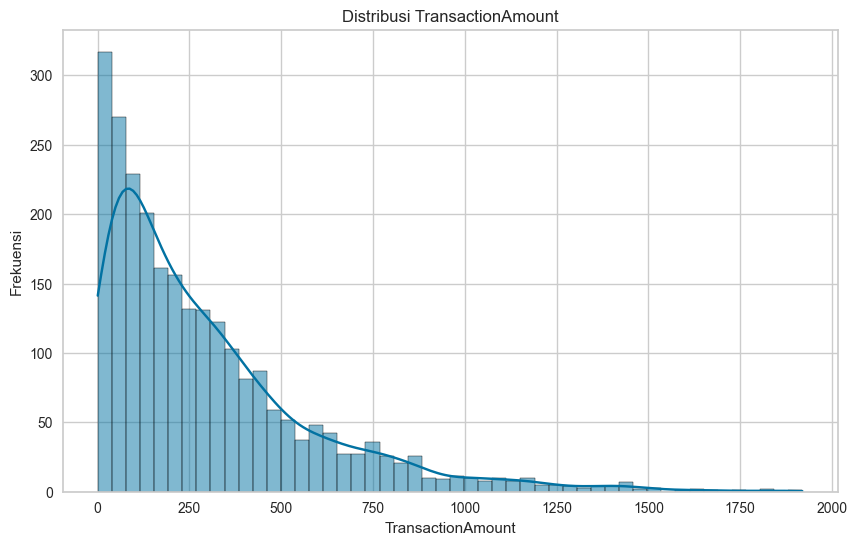

In [126]:
# Histogram untuk TransactionAmount sebelum di bersihkan
plt.figure(figsize=(10, 6))
sns.histplot(df['TransactionAmount'], bins=50, kde=True)
plt.title("Distribusi TransactionAmount")
plt.xlabel("TransactionAmount")
plt.ylabel("Frekuensi")
plt.show()

In [127]:
df_cleaned = df[df['TransactionAmount_zscore'].abs() <= 3]

Text(0, 0.5, 'Frekuensi')

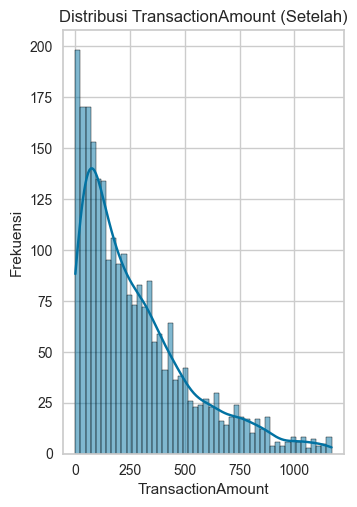

In [128]:
# Histogram untuk TransactionAmount sesudah di bersihkan

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['TransactionAmount'], bins=50, kde=True)
plt.title("Distribusi TransactionAmount (Setelah)")
plt.xlabel("TransactionAmount")
plt.ylabel("Frekuensi")

In [129]:
#identifikasi CustomerAge menggunakan Z-Score

df['CustomerAge_zscore'] = zscore(df['CustomerAge'])

outliers_age_zscore = df[(df['CustomerAge_zscore'].abs() > 3)]

print("Outliers pada CustomerAge (Z-score):")
print(outliers_age_zscore[['TransactionID', 'CustomerAge', 'CustomerAge_zscore']])
print(df[['TransactionID', 'CustomerAge', 'CustomerAge_zscore']])

Outliers pada CustomerAge (Z-score):
Empty DataFrame
Columns: [TransactionID, CustomerAge, CustomerAge_zscore]
Index: []
     TransactionID  CustomerAge  CustomerAge_zscore
0         TX000001           70            1.423718
1         TX000002           68            1.311287
2         TX000003           19           -1.443277
3         TX000004           26           -1.049768
4         TX000005           26           -1.049768
5         TX000006           18           -1.499493
6         TX000007           37           -0.431397
7         TX000008           67            1.255071
8         TX000009           51            0.355622
9         TX000010           55            0.580484
10        TX000011           52            0.411837
11        TX000012           21           -1.330846
12        TX000013           24           -1.162199
13        TX000014           26           -1.049768
14        TX000015           18           -1.499493
15        TX000016           36           -0.48

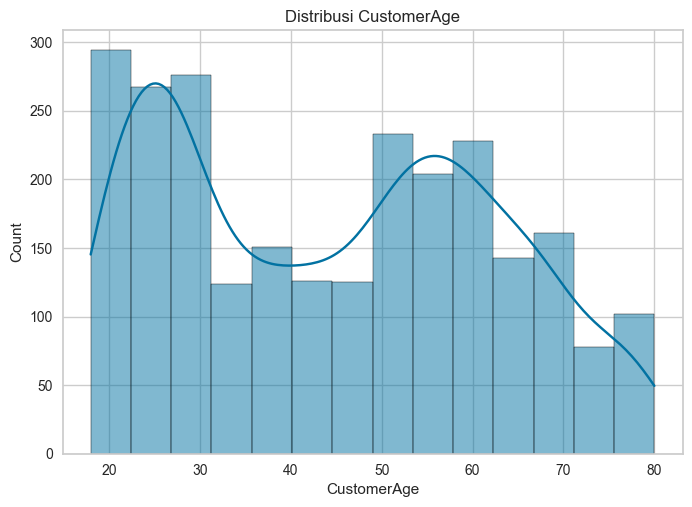

In [130]:
#CustomerAge sudah bersih, berikut histogramnya

sns.histplot(df['CustomerAge'], kde=True)
plt.title("Distribusi CustomerAge")
plt.show()


In [131]:
#memeriksa statistik CustomerAge untuk memastikan data benar2 bersih

print(df['CustomerAge'].describe())

count    2512.000000
mean       44.673965
std        17.792198
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: CustomerAge, dtype: float64


In [132]:
# Hitung Z-Score untuk kolom TransactionDuration
df['TransactionDuration_zscore'] = zscore(df['TransactionDuration'])

outliers_transaction_duration = df[
    (df['TransactionDuration_zscore'].abs() > 3)
]

print("Outliers pada TransactionDuration (Z-score):")
print(outliers_transaction_duration[[
    'TransactionID', 
    'TransactionDuration', 
    'TransactionDuration_zscore'
]])

Outliers pada TransactionDuration (Z-score):
Empty DataFrame
Columns: [TransactionID, TransactionDuration, TransactionDuration_zscore]
Index: []


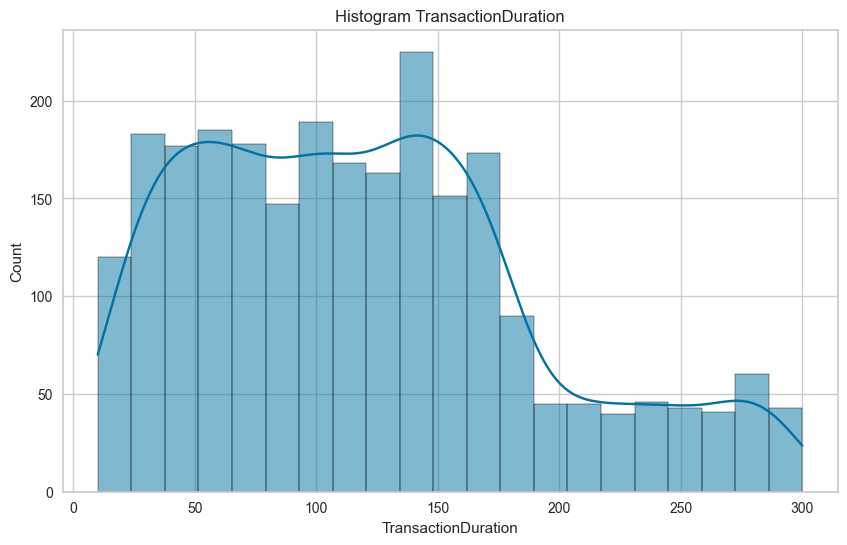

In [133]:
# TransactionDuration sudah bersih berikut visualisasinya
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TransactionDuration', kde=True)
plt.title('Histogram TransactionDuration')
plt.show()

In [134]:
#cek statistik untuk mengecek kembali, apakah benar2 bersih

print(df['TransactionDuration'].describe())

count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64


In [135]:
#menghitung frekuensi TransactionType:

transaction_type_counts = df['TransactionType'].value_counts()
print("Frekuensi TransactionType:")
print(transaction_type_counts)

Frekuensi TransactionType:
TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64


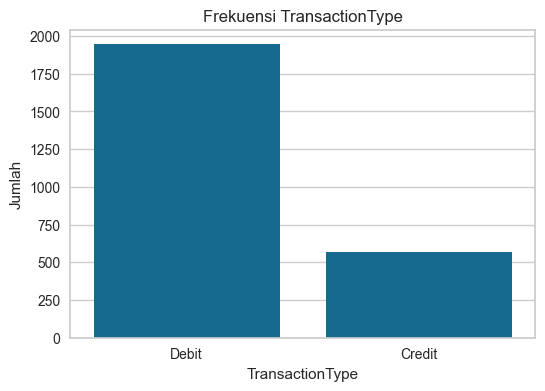

In [136]:
#visualisasi menggunakan barchart vertikal

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='TransactionType')
plt.title("Frekuensi TransactionType")
plt.xlabel("TransactionType")
plt.ylabel("Jumlah")
plt.show()

In [137]:
# #menghitung outlier
threshold = 0.01 * len(df)  
outliers_transaction_type = transaction_type_counts[transaction_type_counts < threshold]
print("Outlier pada TransactionType:")
print(outliers_transaction_type)

Outlier pada TransactionType:
Series([], Name: count, dtype: int64)


In [138]:
# Hitung frekuensi setiap kategori dalam CustomerOccupation
occupation_counts = df['CustomerOccupation'].value_counts()
print("Frekuensi CustomerOccupation:")
print(occupation_counts)


Frekuensi CustomerOccupation:
CustomerOccupation
Student     657
Doctor      631
Engineer    625
Retired     599
Name: count, dtype: int64


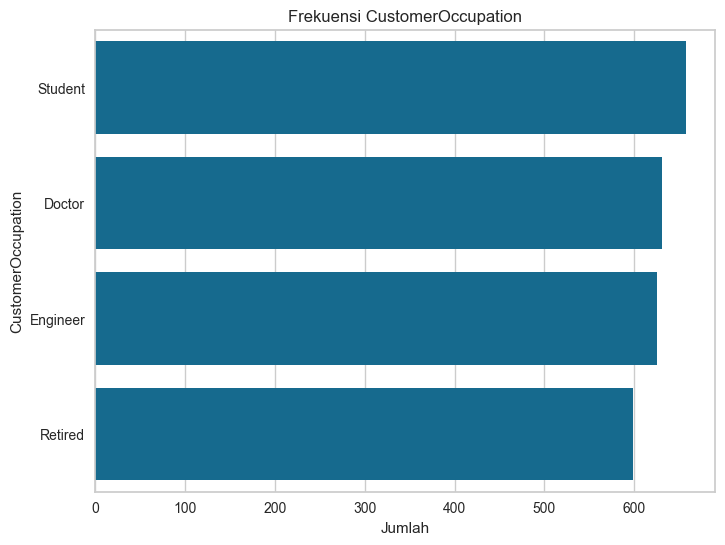

In [139]:
#visualisasi menggunakan barchart horizontal

plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='CustomerOccupation', order=occupation_counts.index)
plt.title("Frekuensi CustomerOccupation")
plt.xlabel("Jumlah")
plt.ylabel("CustomerOccupation")
plt.show()

In [140]:
#mendeteksi outlier

threshold = 0.01 * len(df)  
outliers_occupation = occupation_counts[occupation_counts < threshold]
print("Outlier pada CustomerOccupation:")
print(outliers_occupation)

Outlier pada CustomerOccupation:
Series([], Name: count, dtype: int64)


In [141]:
# label encoding TransactionType
label_encoder_transaction = LabelEncoder()
df['TransactionType_encoded'] = label_encoder_transaction.fit_transform(df['TransactionType'])

df_standardized['TransactionType_encoded'] = df['TransactionType_encoded']
print(df[['TransactionType', 'TransactionType_encoded']].head())

  TransactionType  TransactionType_encoded
0           Debit                        1
1           Debit                        1
2           Debit                        1
3           Debit                        1
4          Credit                        0


In [142]:
# Label Encoding untuk CustomerOccupation
label_encoder_occupation = LabelEncoder()
df['CustomerOccupation_encoded'] = label_encoder_occupation.fit_transform(df['CustomerOccupation'])

print(df[['CustomerOccupation', 'CustomerOccupation_encoded']].head())

  CustomerOccupation  CustomerOccupation_encoded
0             Doctor                           0
1             Doctor                           0
2            Student                           3
3            Student                           3
4            Student                           3


In [143]:
# Binning untuk TransactionAmount
bins_amount = [0, 50, 100, 500, 1000, float('inf')]
labels_amount = ['0-50', '51-100', '101-500', '501-1000', '1000+']
df['TransactionAmountGroup'] = pd.cut(df['TransactionAmount'], bins=bins_amount, labels=labels_amount)

# Binning untuk CustomerAge
bins_age = [0, 18, 35, 50, 65, float('inf')]
labels_age = ['0-18', '19-35', '36-50', '51-65', '66+']
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=bins_age, labels=labels_age)

# Binning untuk TransactionDuration
bins_duration = [0, 30, 60, 120, 180, float('inf')]  # Define bins for duration in seconds
labels_duration = ['0-30', '31-60', '61-120', '121-180', '180+']
df['TransactionDurationGroup'] = pd.cut(df['TransactionDuration'], bins=bins_duration, labels=labels_duration)

print("Binning untuk TransactionAmount:")
print(df[['TransactionAmount', 'TransactionAmountGroup']].head())

print("\nBinning untuk CustomerAge:")
print(df[['CustomerAge', 'AgeGroup']].head())

print("\nBinning untuk TransactionDuration:")
print(df[['TransactionDuration', 'TransactionDurationGroup']].head())

Binning untuk TransactionAmount:
   TransactionAmount TransactionAmountGroup
0              14.09                   0-50
1             376.24                101-500
2             126.29                101-500
3             184.50                101-500
4              13.45                   0-50

Binning untuk CustomerAge:
   CustomerAge AgeGroup
0           70      66+
1           68      66+
2           19    19-35
3           26    19-35
4           26    19-35

Binning untuk TransactionDuration:
   TransactionDuration TransactionDurationGroup
0                   81                   61-120
1                  141                  121-180
2                   56                    31-60
3                   25                     0-30
4                  198                     180+


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [144]:
#menentukan fitur yang digunakan untuk clustering

X = df[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 
        'CustomerOccupation_encoded', 'TransactionType_encoded']]

print("\nFitur yang Digunakan untuk Clustering:")
print(X)


Fitur yang Digunakan untuk Clustering:
      TransactionAmount  CustomerAge  TransactionDuration  \
0                 14.09           70                   81   
1                376.24           68                  141   
2                126.29           19                   56   
3                184.50           26                   25   
4                 13.45           26                  198   
5                 92.15           18                  172   
6                  7.08           37                  139   
7                171.42           67                  291   
8                106.23           51                   86   
9                815.96           55                  120   
10                17.78           52                   59   
11               190.02           21                  173   
12               494.52           24                  111   
13               781.76           26                  123   
14               166.99           18         

In [145]:
# Clustering menggunakan K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
df_standardized['Cluster'] = kmeans.fit_predict(X)

print("\nData Setelah Clustering:")
print(df_standardized[['CustomerOccupation', 'TransactionAmount', 'CustomerAge', 'TransactionDuration', 'TransactionType', 'Cluster']].head(10))
print("Dimensi pusat cluster (kmeans.cluster_centers_):", kmeans.cluster_centers_.shape)  


Data Setelah Clustering:
  CustomerOccupation  TransactionAmount  CustomerAge  TransactionDuration  \
0             Doctor          -0.971275     1.423718            -0.552443   
1             Doctor           0.269440     1.311287             0.305314   
2            Student          -0.586882    -1.443277            -0.909842   
3            Student          -0.387456    -1.049768            -1.353017   
4            Student          -0.973468    -1.049768             1.120184   
5            Student          -0.703844    -1.499493             0.748489   
6             Doctor          -0.995292    -0.431397             0.276722   
7            Retired          -0.432268     1.255071             2.449708   
8           Engineer          -0.655607     0.355622            -0.480963   
9             Doctor           1.775907     0.580484             0.005099   

  TransactionType  Cluster  
0           Debit        0  
1           Debit        0  
2           Debit        0  
3         

In [146]:
# Pilih hanya kolom numerik untuk analisis statistik
numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'TransactionType_encoded']

cluster_stats = df_standardized.groupby('Cluster')[numerical_columns].mean()
print("\nStatistik Deskriptif untuk Setiap Cluster:")
print(cluster_stats)


Statistik Deskriptif untuk Setiap Cluster:
         TransactionAmount  CustomerAge  TransactionDuration  \
Cluster                                                        
0                -0.403239     0.013481             0.003569   
1                 1.647238    -0.055071            -0.014579   

         TransactionType_encoded  
Cluster                           
0                       0.776511  
1                       0.763158  


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [147]:
#elbow method
k_values = range(2, 10)

silhouette_scores_before = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores_before.append(score)


In [148]:

# Silhouette Score untuk mengevaluasi jumlah cluster
silhouette_scores = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_standardized[columns_to_standardize])
    score = silhouette_score(df_standardized[columns_to_standardize], labels)
    silhouette_scores.append(score)


In [149]:
# Temukan nilai Silhouette Score maksimum
best_k_before = k_values[silhouette_scores_before.index(max(silhouette_scores_before))]
best_score_before = max(silhouette_scores_before)
print(f" Silhouette Score terbaik: {best_score_before:.2f} (K={best_k_before})")

 Silhouette Score terbaik: 0.62 (K=2)


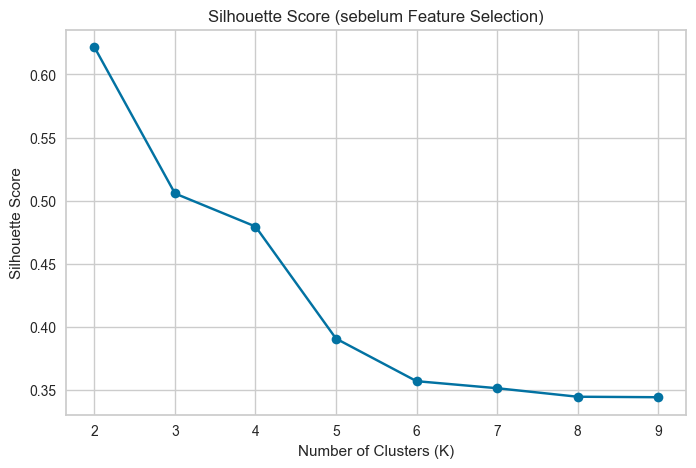

In [150]:
# Plot hasil Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores_before, marker='o', label='Before Feature Selection')
plt.title('Silhouette Score (sebelum Feature Selection)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [151]:
X.head()

TransactionAmount  CustomerAge  TransactionDuration  \
0              14.09           70                   81   
1             376.24           68                  141   
2             126.29           19                   56   
3             184.50           26                   25   
4              13.45           26                  198   

   CustomerOccupation_encoded  TransactionType_encoded  
0                           0                        1  
1                           0                        1  
2                           3                        1  
3                           3                        1  
4                           3                        0

In [152]:
kmeans.cluster_centers_

array([[-0.46466256,  0.91433068, -0.90532421],
       [-0.4460684 ,  0.81404515,  0.35965883],
       [ 0.98472675, -0.86790733, -0.27045402],
       [-0.08229054, -0.86706745,  1.93304894],
       [ 1.20674228,  0.92182944, -0.25139094],
       [-0.46958481, -0.84391198, -0.93067353],
       [ 3.20482246, -0.30700458,  0.14684212],
       [-0.24351855,  0.92695592,  1.82156144],
       [-0.503175  , -0.94599762,  0.40366417]])

In [155]:
df_standardized['Cluster']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       1
10      0
11      0
12      1
13      1
14      0
15      0
16      1
17      1
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      1
34      0
35      0
36      0
37      1
38      1
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      1
48      1
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      1
61      0
62      0
63      1
64      0
65      0
66      0
67      1
68      0
69      0
70      0
71      0
72      0
73      0
74      1
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      1
83      0
84      0
85      1
86      0
87      1
88      0
89      0
90      1
91      0
92      0
93      0
94      1
95      1
96      1
97      0
98      0
99      0


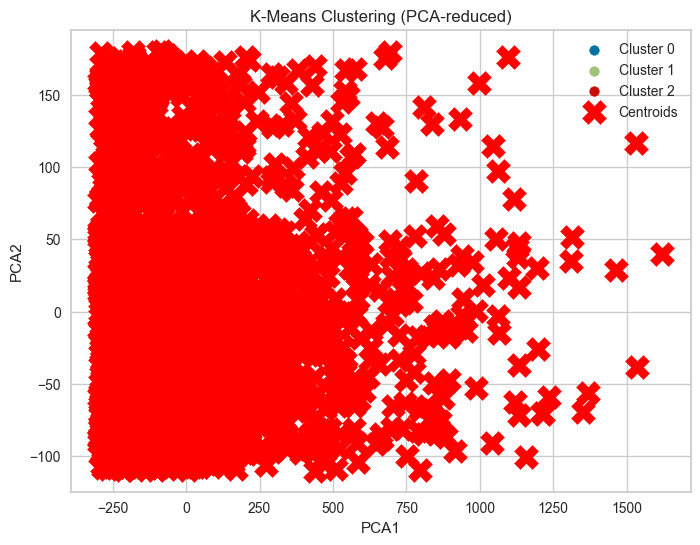

In [157]:
# Latih PCA pada data yang telah distandardisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_standardized['PCA1'] = X_pca[:, 0]
df_standardized['PCA2'] = X_pca[:, 1]

centroids_pca = pca.transform(X)

plt.figure(figsize=(8, 6))
for cluster in range(3):
    cluster_data = df_standardized[df_standardized['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('K-Means Clustering (PCA-reduced)')
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [158]:
# Menambahkan label cluster ke DataFrame yang telah distandarisasi
df_standardized['Cluster'] = kmeans.labels_

In [159]:
 #Inverse transform untuk mengembalikan nilai ke bentuk asli
label_encoder = LabelEncoder()
df['TransactionType_encoded'] = label_encoder.fit_transform(df['TransactionType'])

df_standardized = df[['TransactionType_encoded']].copy()
df_standardized['TransactionType'] = label_encoder.inverse_transform(df_standardized['TransactionType_encoded'])

In [160]:
# Memasukkan data hasil inverse transform ke dataset asli
df['TransactionType'] = df_standardized['TransactionType']

print("\nDataFrame df setelah penambahan kolom:")
print(df)



DataFrame df setelah penambahan kolom:
     TransactionID AccountID  TransactionAmount      TransactionDate  \
0         TX000001   AC00128              14.09  2023-04-11 16:29:14   
1         TX000002   AC00455             376.24  2023-06-27 16:44:19   
2         TX000003   AC00019             126.29  2023-07-10 18:16:08   
3         TX000004   AC00070             184.50  2023-05-05 16:32:11   
4         TX000005   AC00411              13.45  2023-10-16 17:51:24   
5         TX000006   AC00393              92.15  2023-04-03 17:15:01   
6         TX000007   AC00199               7.08  2023-02-15 16:36:48   
7         TX000008   AC00069             171.42  2023-05-08 17:47:59   
8         TX000009   AC00135             106.23  2023-03-21 16:59:46   
9         TX000010   AC00385             815.96  2023-03-31 16:06:57   
10        TX000011   AC00150              17.78  2023-03-14 16:46:10   
11        TX000012   AC00459             190.02  2023-02-06 17:30:00   
12        TX000013   AC0

In [161]:
#  Membuat DataFrame baru
df_new = pd.DataFrame()
df_new['TransactionType'] = df_standardized['TransactionType']

print("\nDataFrame Baru:")
print(df_new)


DataFrame Baru:
     TransactionType
0              Debit
1              Debit
2              Debit
3              Debit
4             Credit
5              Debit
6             Credit
7             Credit
8             Credit
9              Debit
10            Credit
11             Debit
12            Credit
13             Debit
14             Debit
15             Debit
16            Credit
17             Debit
18            Credit
19            Credit
20             Debit
21             Debit
22             Debit
23             Debit
24             Debit
25            Credit
26             Debit
27             Debit
28             Debit
29             Debit
30            Credit
31             Debit
32             Debit
33             Debit
34            Credit
35             Debit
36             Debit
37             Debit
38             Debit
39             Debit
40             Debit
41             Debit
42            Credit
43             Debit
44             Debit
45             De

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [162]:
# Inverse transform untuk mengembalikan nilai 'TransactionAmount' ke bentuk asli

scaler_transaction = StandardScaler()
df_standardized['TransactionAmount_scaled'] = scaler_transaction.fit_transform(df[['TransactionAmount']])

# Inverse transform untuk mengembalikan nilai ke bentuk asli
df_standardized['TransactionAmount_recovered'] = scaler_transaction.inverse_transform(df_standardized[['TransactionAmount_scaled']])
print("\nDataset Setelah Inverse Transform untuk 'TransactionAmount':")
print(df_standardized[['TransactionAmount', 'TransactionAmount_scaled', 'TransactionAmount_recovered']])


Dataset Setelah Inverse Transform untuk 'TransactionAmount':


KeyError: "['TransactionAmount'] not in index"

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [192]:
# Menambahkan label cluster ke DataFrame yang telah dinormalisasi
df_standardized['Cluster'] = kmeans.labels_

print("\nDataFrame dengan Label Cluster:")
print(df_standardized.head())


DataFrame dengan Label Cluster:
   TransactionType_encoded TransactionType  TransactionAmount_scaled  \
0                        1           Debit                 -0.971275   
1                        1           Debit                  0.269440   
2                        1           Debit                 -0.586882   
3                        1           Debit                 -0.387456   
4                        0          Credit                 -0.973468   

   TransactionAmount_recovered  Cluster  
0                        14.09        0  
1                       376.24        1  
2                       126.29        5  
3                       184.50        5  
4                        13.45        8  


In [193]:
# Inverse transform untuk mengembalikan nilai 'Fitur' ke bentuk asli
df_standardized['TransactionType'] = label_encoder.inverse_transform(df_standardized['TransactionType_encoded'])

print("\nDataFrame Setelah Inverse Transform untuk 'TransactionType':")
print(df_standardized[['TransactionType', 'TransactionType_encoded']])


DataFrame Setelah Inverse Transform untuk 'TransactionType':
     TransactionType  TransactionType_encoded
0              Debit                        1
1              Debit                        1
2              Debit                        1
3              Debit                        1
4             Credit                        0
5              Debit                        1
6             Credit                        0
7             Credit                        0
8             Credit                        0
9              Debit                        1
10            Credit                        0
11             Debit                        1
12            Credit                        0
13             Debit                        1
14             Debit                        1
15             Debit                        1
16            Credit                        0
17             Debit                        1
18            Credit                        0
19            Cred

In [55]:
# Menghitung statistik deskriptif untuk tiap cluster
filtered_clusters = df_standardized[df_standardized['Cluster'].isin([0, 1, 2,])]

cluster_analysis = filtered_clusters.groupby('Cluster').agg({
    'TransactionAmount': ['mean', 'median', 'std'],
    'CustomerAge': ['mean', 'median', 'std'],
    'TransactionType': lambda x: x.mode()[0]  
})

print("\nKarakteristik Tiap Cluster (Cluster 0-3):")
print(cluster_analysis)

KeyError: "Column(s) ['CustomerAge', 'TransactionAmount'] do not exist"

Tulis hasil interpretasinya di sini.


1. Cluster 0:

- **Rata-rata TransactionAmount:** -0.464663

- **Median TransactionAmount:** -0.556048

- **Standar Deviasi TransactionAmount:** 0.414142

- **Rata-rata CustomerAge:** 0.914331

- **Median CustomerAge:** 0.861562

- **Standar Deviasi CustomerAge:** 0.496666

- **Modus TransactionType:** Debit


2. Cluster 1:

- **Rata-rata TransactionAmount:** -0.446068

- **Median TransactionAmount:** -0.555089

- **Standar Deviasi TransactionAmount:** 0.431469

- **Rata-rata CustomerAge:** 0.814045

- **Median CustomerAge:** 0.749131

- **Standar Deviasi CustomerAge:** 0.526062

- **Modus TransactionType:** Debit


3. Cluster 2:

- **Rata-rata TransactionAmount:** 0.984727

- **Median TransactionAmount:** 0.929418

-  **Standar Deviasi TransactionAmount:** 0.508409

- **Rata-rata CustomerAge:** -0.867907

- **Median CustomerAge:** -0.993553

- **Standar Deviasi CustomerAge:** 0.440196

-Modus TransactionType: Debit
# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata TransactionAmount:** -0.464663

- **Median TransactionAmount:** -0.556048

- **Standar Deviasi TransactionAmount:** 0.414142

- **Rata-rata CustomerAge:** 0.914331

- **Median CustomerAge:** 0.861562

- **Standar Deviasi CustomerAge:** 0.496666

- **Modus TransactionType:** Debit

  Analisis:
  Cluster ini mencakup pelanggan dengan jumlah transaksi kecil (TransactionAmount negatif setelah standardisasi) dan usia dewasa (CustomerAge positif). Pelanggan dalam cluster ini cenderung melakukan transaksi rutin dengan nilai rendah, kemungkinan untuk kebutuhan sehari-hari. Mereka juga lebih sering menggunakan metode pembayaran Debit, menunjukkan preferensi terhadap pembayaran langsung tanpa utang.


## Cluster 1:
- **Rata-rata TransactionAmount:** -0.446068
- **Median TransactionAmount:** -0.555089
- **Standar Deviasi TransactionAmount:** 0.431469
- **Rata-rata CustomerAge:** 0.814045
- **Median CustomerAge:** 0.749131
- **Standar Deviasi CustomerAge:** 0.526062
- **Modus TransactionType:** Debit

  Analisis:
  Cluster ini mirip dengan Cluster 0, dengan jumlah transaksi kecil (TransactionAmount negatif) dan usia dewasa (CustomerAge positif). Pelanggan dalam cluster ini juga memiliki pola transaksi yang serupa, yaitu transaksi kecil dan rutin. Dominasi metode pembayaran Debit menunjukkan bahwa mereka lebih suka menghindari risiko utang atau cicilan.

## Cluster 2:
- **Rata-rata TransactionAmount:** 0.984727
- **Median TransactionAmount:** 0.929418
- **Standar Deviasi TransactionAmount:** 0.508409
- **Rata-rata CustomerAge:** -0.867907
- **Median CustomerAge:** -0.993553
- **Standar Deviasi CustomerAge:** 0.440196
- **Modus TransactionType:** Debit

  Analisis:
   Cluster ini mencakup pelanggan muda (CustomerAge negatif) dengan jumlah transaksi besar (TransactionAmount positif). Pelanggan dalam cluster ini cenderung melakukan transaksi dengan nilai tinggi, meskipun usia mereka relatif muda. Meskipun mereka menggunakan metode pembayaran Debit, kemungkinan besar mereka memiliki akses ke dana yang cukup besar, seperti melalui pekerjaan sampingan atau dukungan finansial dari keluarga. Cluster ini dapat menjadi target potensial untuk produk-produk premium atau layanan eksklusif.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [199]:
labels = kmeans.labels_

In [53]:
df_standardized['Cluster'] = labels

In [54]:
df.to_csv('hasil_clustering.csv', index=False)

print("Data clustering berhasil disimpan ke file 'hasil_clustering.csv'")

Data clustering berhasil disimpan ke file 'hasil_clustering.csv'
